# Processing of CellProfiler features

CellProfiler features have been computed on EhV data form the first large scale experiment, on files: H1_T7, H1_T8, H1_T9, H2_T7, H2_T8, H2_T9

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
# %load ../common_.py
import sys
sys.path.append("..")
from common import *

In [9]:
data_dir = os.environ["VSC_DATA_VO_USER"]
df = pandas.concat([
    pandas.read_csv(f"{data_dir}/datasets/weizmann/EhV/v2/results/cp_output/202111022047_4/{i}/BF_cells_on_grid.csv", skiprows=1)
    for i in range(1,5)
])

In [10]:
df.shape

(14200, 258)

In [11]:
df.head()

,ImageNumber,ObjectNumber,FileName_1,FileName_3,FileName_7,PathName_1,PathName_3,PathName_7,AreaShape_Area,AreaShape_BoundingBoxArea,...,Texture_SumVariance_r7_3_02_256,Texture_SumVariance_r7_3_03_256,Texture_Variance_r3_3_00_256,Texture_Variance_r3_3_01_256,Texture_Variance_r3_3_02_256,Texture_Variance_r3_3_03_256,Texture_Variance_r7_3_00_256,Texture_Variance_r7_3_01_256,Texture_Variance_r7_3_02_256,Texture_Variance_r7_3_03_256
0,1,1,0_Ch1.tiff,0_Ch3.tiff,0_Ch7.tiff,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,145.0,196.0,...,37.909525,31.205349,0.022675,0.020706,0.020896,0.020785,12.120612,12.768328,12.091260,12.787824
1,1,2,0_Ch1.tiff,0_Ch3.tiff,0_Ch7.tiff,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,162.0,196.0,...,48.804797,41.322691,0.025220,0.019057,0.026668,0.024040,15.090764,16.035176,15.069748,16.026976
2,1,3,0_Ch1.tiff,0_Ch3.tiff,0_Ch7.tiff,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,200.0,272.0,...,37.374270,32.957605,0.024375,0.025844,0.024508,0.026686,11.559566,12.053656,11.589378,12.322481
3,1,4,0_Ch1.tiff,0_Ch3.tiff,0_Ch7.tiff,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,170.0,240.0,...,43.094854,37.718177,0.121023,0.116122,0.124793,0.119868,13.003549,13.543362,13.009098,13.791121
4,1,5,0_Ch1.tiff,0_Ch3.tiff,0_Ch7.tiff,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,/user/gent/420/vsc42015/vsc_data_vo/datasets/w...,239.0,324.0,...,94.720161,85.046996,0.013336,0.011656,0.012130,0.014160,27.768828,28.981583,27.834773,28.959558


In [19]:
df.columns[df.isna().all(axis=0)]

Index([], dtype='object')

In [21]:
df.columns[df.isna().any(axis=0)]

Index(['AreaShape_Area', 'AreaShape_BoundingBoxArea',
       'AreaShape_BoundingBoxMaximum_X', 'AreaShape_BoundingBoxMaximum_Y',
       'AreaShape_BoundingBoxMinimum_X', 'AreaShape_BoundingBoxMinimum_Y',
       'AreaShape_Center_X', 'AreaShape_Center_Y', 'AreaShape_Compactness',
       'AreaShape_ConvexArea', 'AreaShape_Eccentricity',
       'AreaShape_EquivalentDiameter', 'AreaShape_EulerNumber',
       'AreaShape_Extent', 'AreaShape_FormFactor', 'AreaShape_MajorAxisLength',
       'AreaShape_MaxFeretDiameter', 'AreaShape_MaximumRadius',
       'AreaShape_MeanRadius', 'AreaShape_MedianRadius',
       'AreaShape_MinFeretDiameter', 'AreaShape_MinorAxisLength',
       'AreaShape_Orientation', 'AreaShape_Perimeter', 'AreaShape_Solidity',
       'Intensity_IntegratedIntensityEdge_1',
       'Intensity_IntegratedIntensity_1', 'Intensity_LowerQuartileIntensity_1',
       'Intensity_MADIntensity_1', 'Intensity_MassDisplacement_1',
       'Intensity_MaxIntensityEdge_1', 'Intensity_MaxIntensity

# Feature correlation

In [48]:
df = df.drop(columns=df.filter(regex="feat.*").loc[:, df.filter(regex="feat.*").std(axis=0) == 0].columns) # remove feature columns which have no variance

In [49]:
correlation = df.filter(regex="feat_.*").corr()

In [50]:
correlation

,feat_watershed_area_0,feat_watershed_convex_area_0,feat_watershed_eccentricity_0,feat_watershed_equivalent_diameter_0,feat_watershed_euler_number_0,feat_watershed_feret_diameter_max_0,feat_watershed_filled_area_0,feat_watershed_inertia_tensor-0-0_0,feat_watershed_inertia_tensor-0-1_0,feat_watershed_inertia_tensor-1-0_0,...,feat_watershed_hog_ch_3_27,feat_watershed_hog_ch_3_28,feat_watershed_hog_ch_3_29,feat_watershed_hog_ch_3_30,feat_watershed_hog_ch_3_31,feat_watershed_hog_ch_3_32,feat_watershed_hog_ch_3_33,feat_watershed_hog_ch_3_34,feat_watershed_hog_ch_3_35,feat_watershed_majorminor_ratio
feat_watershed_area_0,1.000000,0.987618,0.097088,0.986685,-0.373161,0.968191,0.988345,0.910029,0.031688,0.031688,...,0.014728,0.102365,0.217779,-0.070400,-0.130455,-0.135691,-0.058015,0.006633,0.047293,0.110354
feat_watershed_convex_area_0,0.987618,1.000000,0.097324,0.973157,-0.476659,0.972407,0.997510,0.938023,0.038897,0.038897,...,0.023068,0.111049,0.220651,-0.070090,-0.123400,-0.129757,-0.051857,0.009428,0.056261,0.109427
feat_watershed_eccentricity_0,0.097088,0.097324,1.000000,0.113542,-0.005851,0.236223,0.092663,-0.031520,0.028539,0.028539,...,0.026695,0.077800,0.041380,-0.017684,0.034758,0.042899,-0.014153,-0.020782,0.029690,0.931304
feat_watershed_equivalent_diameter_0,0.986685,0.973157,0.113542,1.000000,-0.374107,0.980817,0.974609,0.901892,0.029099,0.029099,...,0.012333,0.083997,0.239868,-0.058319,-0.154320,-0.152481,-0.061943,0.018506,0.032456,0.128696
feat_watershed_euler_number_0,-0.373161,-0.476659,-0.005851,-0.374107,1.000000,-0.435971,-0.488319,-0.505152,-0.026596,-0.026596,...,-0.045414,-0.065512,-0.116237,0.016963,0.022071,0.025197,-0.024211,-0.032478,-0.053033,0.012253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feat_watershed_hog_ch_3_32,-0.135691,-0.129757,0.042899,-0.152481,0.025197,-0.141939,-0.127967,-0.159270,-0.032416,-0.032416,...,0.202015,0.155455,0.093416,0.006609,0.441639,1.000000,0.158733,-0.188529,0.041325,0.047002
feat_watershed_hog_ch_3_33,-0.058015,-0.051857,-0.014153,-0.061943,-0.024211,-0.061839,-0.048647,-0.073669,-0.056364,-0.056364,...,0.085458,-0.006258,0.090725,0.189327,0.342870,0.158733,1.000000,0.107616,-0.008429,-0.024440
feat_watershed_hog_ch_3_34,0.006633,0.009428,-0.020782,0.018506,-0.032478,0.013936,0.012334,0.008466,-0.075020,-0.075020,...,-0.033855,-0.138065,0.082514,0.251111,-0.045353,-0.188529,0.107616,1.000000,0.019523,-0.045704
feat_watershed_hog_ch_3_35,0.047293,0.056261,0.029690,0.032456,-0.053033,0.043026,0.055275,0.039114,-0.097406,-0.097406,...,0.122579,0.208065,-0.062540,-0.128704,0.199184,0.041325,-0.008429,0.019523,1.000000,0.048175


## Overall feature correlation

/opt/conda/envs/env/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


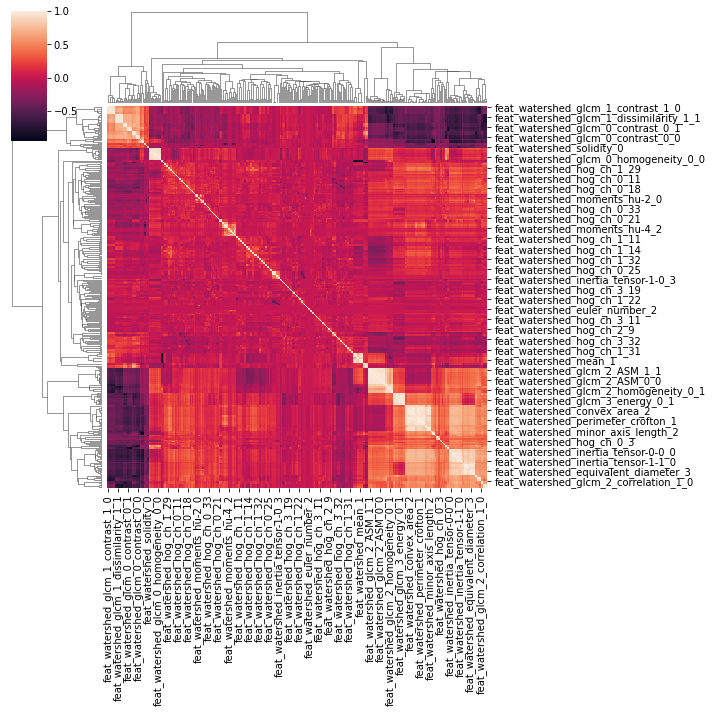

In [51]:
seaborn.clustermap(correlation)

In [65]:
def get_correlated_features(df, cutoff=0.85):
    correlation = df.corr()
    var = df.var()
    correlated_features = set()
    for i in range(correlation.shape[0]):
        for j in range(i):
            if abs(correlation.iloc[i, j]) > 0.9:
                if var[correlation.columns[i]] >= var[correlation.columns[j]]:
                    colname = correlation.columns[j]
                else:
                    colname = correlation.columns[i]
                correlated_features.add(colname)
                
    return correlated_features

In [66]:
correlated_features = get_correlated_features(df.filter(regex="feat"))
correlation2 = df.filter(regex="feat").drop(columns=correlated_features).corr()

/opt/conda/envs/env/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


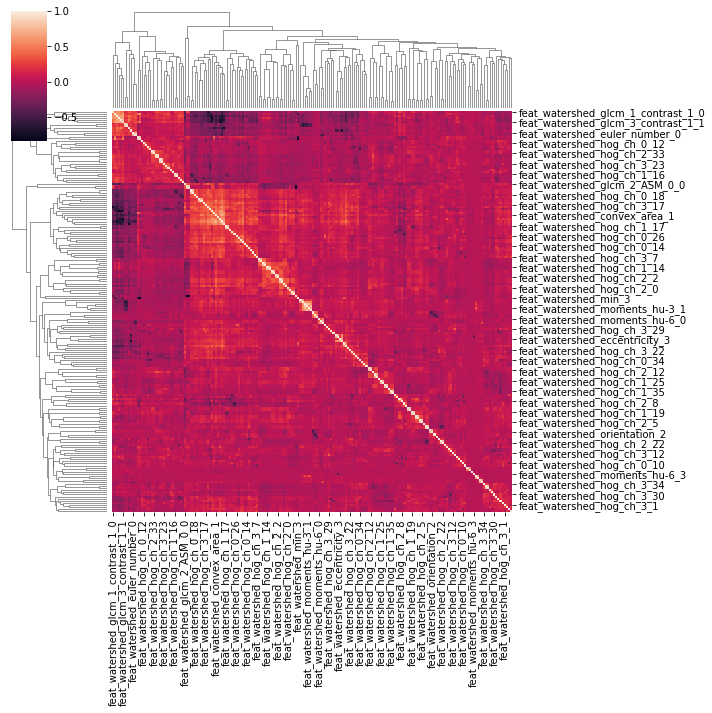

In [67]:
seaborn.clustermap(correlation2)

In [68]:
df = df.drop(columns=correlated_features)

In [69]:
df.shape

(7801, 203)

In [70]:
len(df.index.values)

7801

In [71]:
numpy.save("/data/VIB/Vulcan/vib-vulcan-metadata/preprocessing/correlated_features.npy", list(correlated_features))

In [72]:
numpy.save("/data/VIB/Vulcan/vib-vulcan-metadata/preprocessing/single_focused_index.npy", df.index.values)